In [101]:
# ! pip install mplleaflet
# ! pip install geopandas 
import geopandas as gpd
import numpy as np
import csv
from shapely.geometry import Point
import mplleaflet

In [80]:
file_path = r'D:\Data Analysis\upi_data_analytics\analytics\data\processed_data\UPI.coordinates.csv'
failed_transactions = []

In [82]:
with open(file_path, mode='r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        if row.get('transaction_status') == 'TRANSACTION_FAILED':
            failed_transactions.append(tuple(row.items()))
print(len(failed_transactions))

3770


In [60]:
import geopandas as gpd
file = r'D:\Data Visualization\shapefiles\maharashtra_district.shp'
data_shapefile = gpd.read_file(file)

In [67]:
def check_point_lies_within(logitude, latitude):
    point = Point(logitude, latitude)
    for index, row in data_shapefile.iterrows():
        if row['geometry'].contains(point):
            return True
    return False

In [91]:
logitudes ,latitudes = [] ,[]
for i in range(len(failed_transactions)):
    logitude = float(failed_transactions[i][1][1][:-1])
    latitude = float(failed_transactions[i][2][1][:-1])
    # if check_point_lies_within(logitude, latitude):
    logitudes.append(logitude)
    latitudes.append(latitude)
    

In [92]:
points_data = {
    'ID': [i for i in range(len(latitudes))],
    'latitude' : latitudes,
    'longitude' : logitudes
}

In [98]:
# print(points_data)


<Axes: >

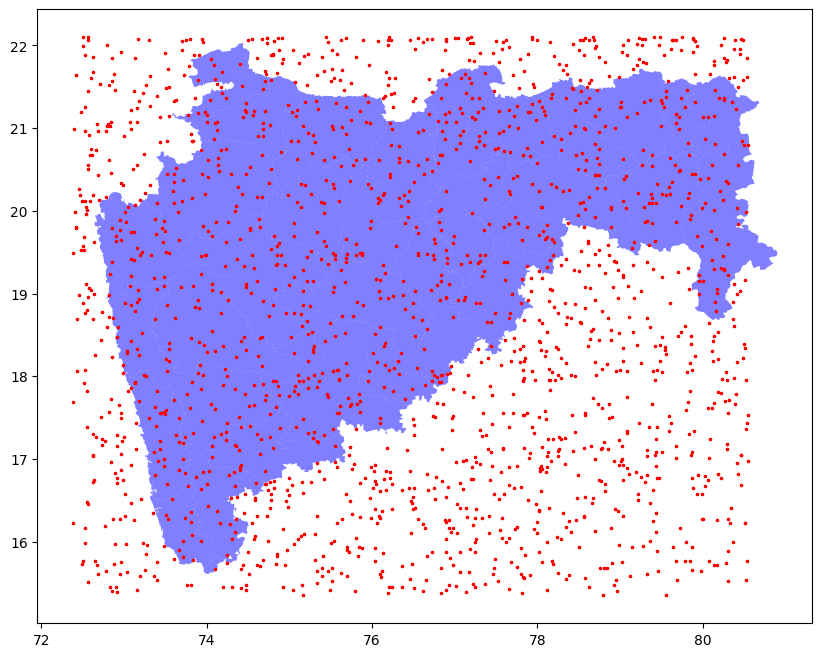

In [108]:

points_df = gpd.GeoDataFrame(points_data, geometry=gpd.points_from_xy(points_data['latitude'], points_data['longitude']))
ax = data_shapefile.plot(color='blue', alpha=0.5, figsize=(10, 10))
points_df.plot(ax=ax, color='red', markersize=2, label='Points')
# mplleaflet.display(fig=ax.figure)

In [109]:
# data_shapefile